In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

### 1.1 Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment(if necessary)and check the basic descriptive statistics of the data set.

In [2]:
df=pd.read_csv("Cars.csv")

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  444 
no. of columns:  9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [6]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [7]:
df.dtypes

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [8]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


In [9]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Gender : 0
Transport : 0


In [10]:
df.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


In [11]:
df[cat].describe()

,Gender,Transport
count,444,444
unique,2,2
top,Male,Public Transport
freq,316,300


In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


In [13]:
len(df.columns)

9

In [14]:
df_new=df.drop(df.columns[[1, 8]], axis=1)
df_new

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
0,28,0,0,4,14.3,3.2,0
1,23,1,0,4,8.3,3.3,0
2,29,1,0,7,13.4,4.1,0
3,28,1,1,5,13.4,4.5,0
4,27,1,0,4,13.4,4.6,0
...,...,...,...,...,...,...,...
439,40,1,0,20,57.0,21.4,1
440,38,1,0,19,44.0,21.5,1
441,37,1,0,19,45.0,21.5,1
442,37,0,0,19,47.0,22.8,1


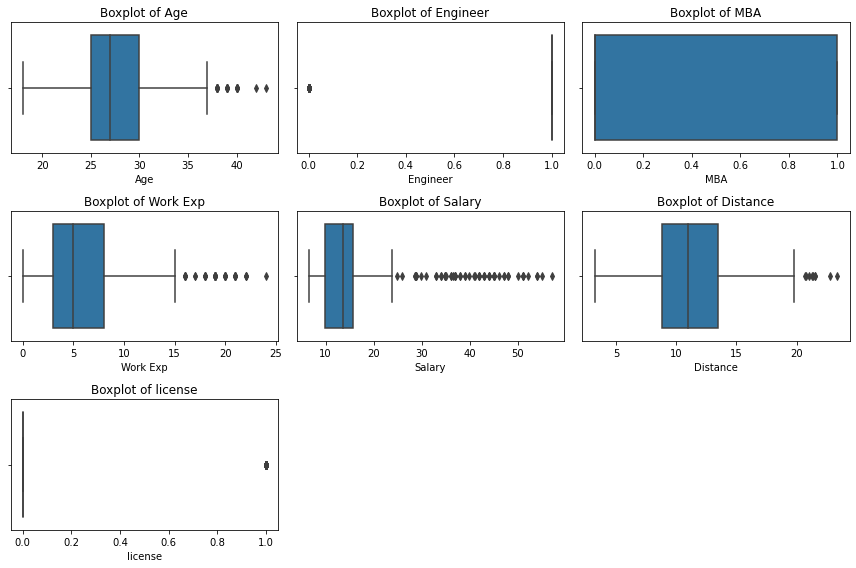

In [15]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df_new[New_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

In [16]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for i in New_list:
    LL, UL = remove_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL, UL, df_new[i])
    df_new[i] = np.where(df_new[i] < LL, LL, df_new[i])

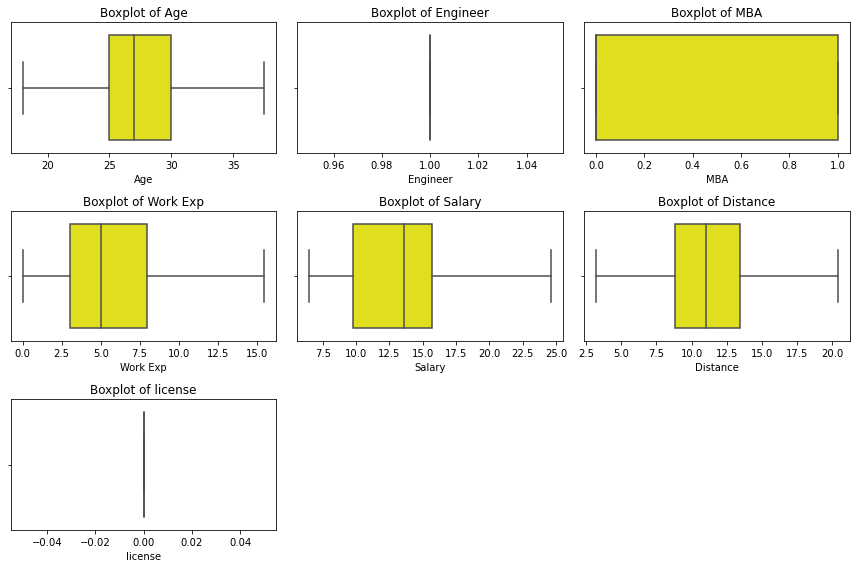

In [18]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df_new[New_list[i]], data = df_new,color='yellow')
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

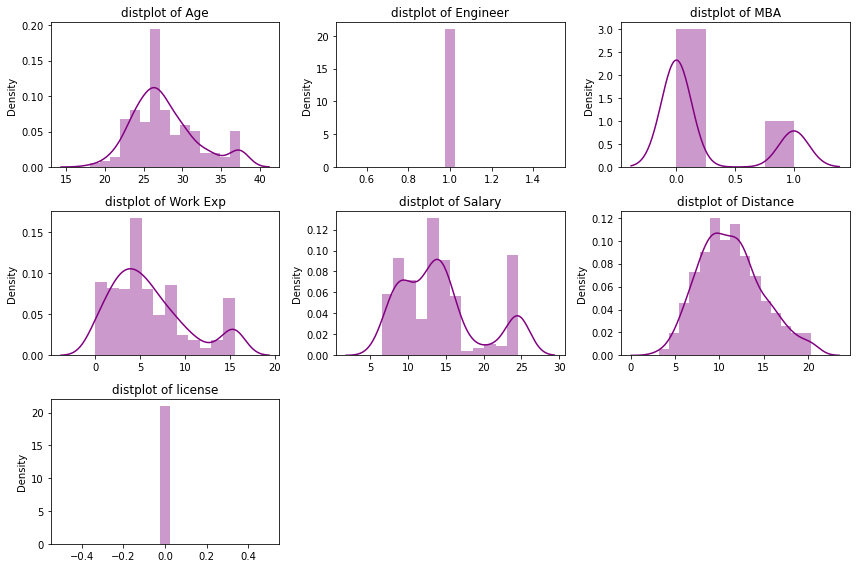

In [19]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(x = df_new[New_list[i]],color='purple')
    plt.title('distplot of {}'.format(New_list[i]))
    plt.tight_layout()

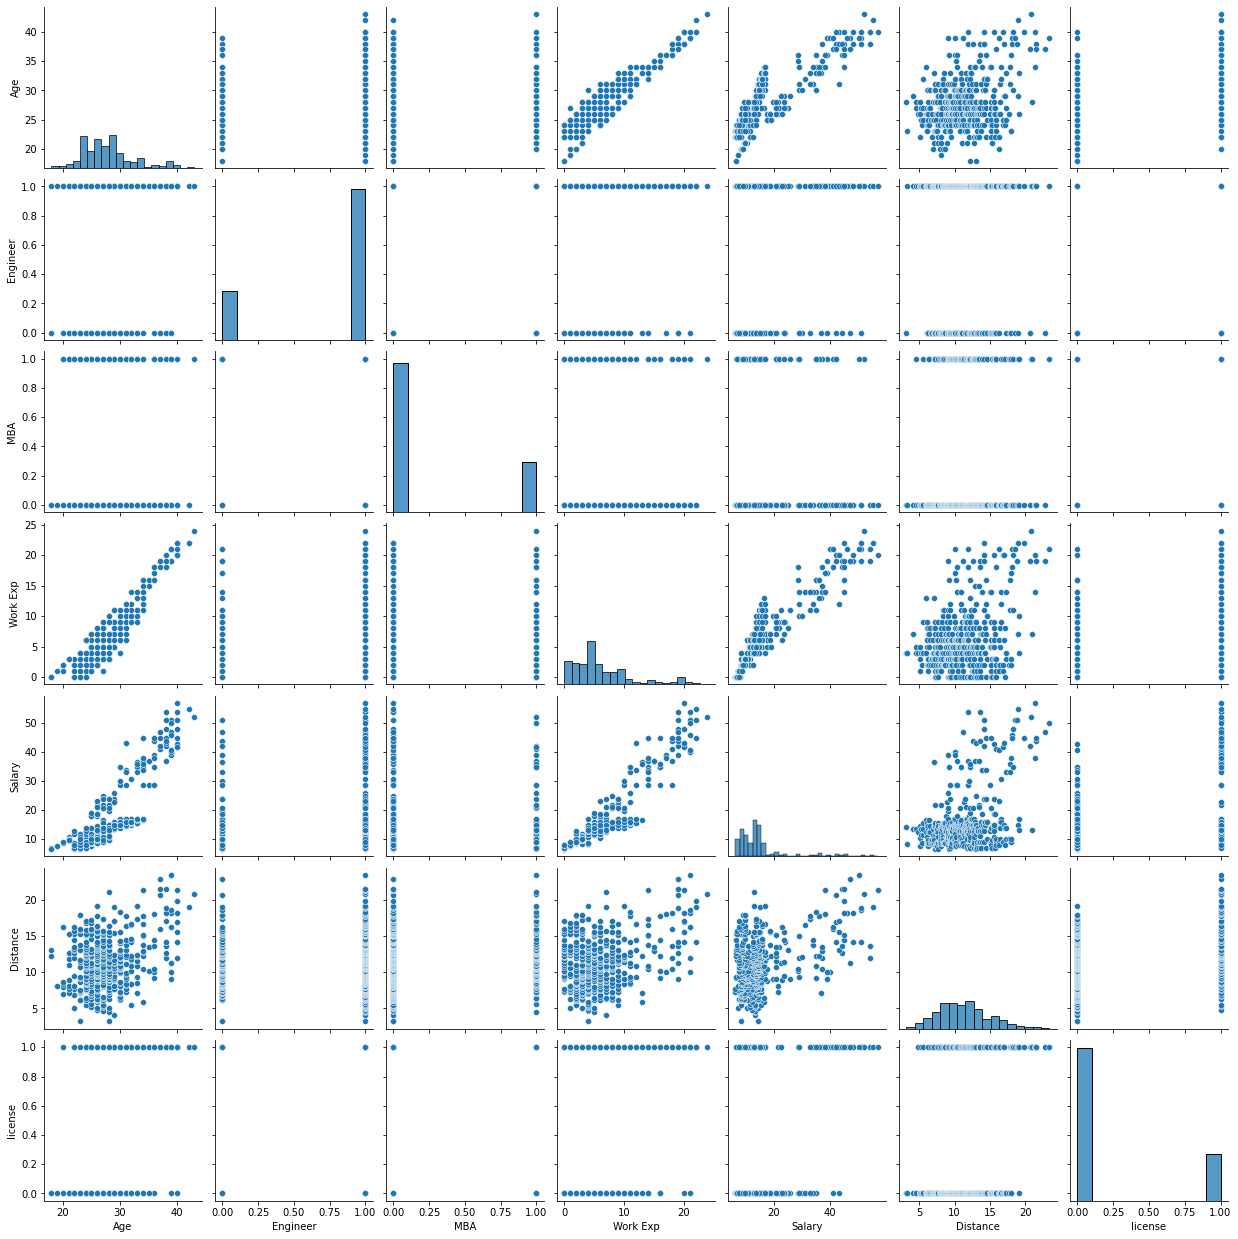

In [20]:
sns.pairplot(df)
plt.show()

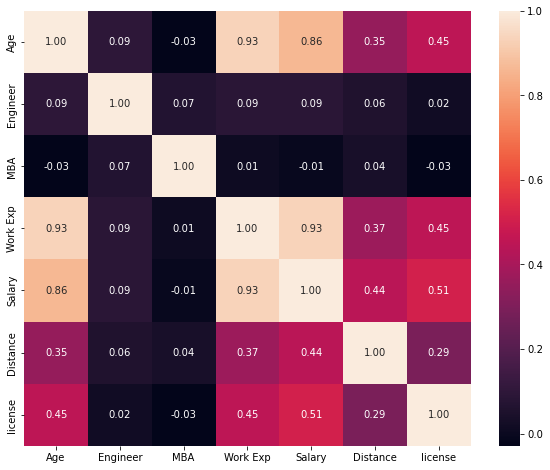

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

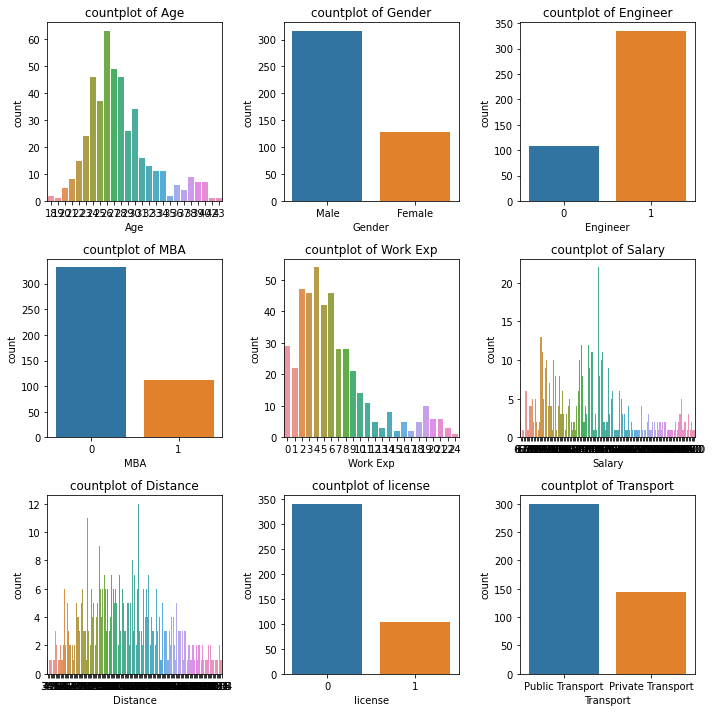

In [22]:
plt.figure(figsize = (10,10))
New_list = df.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x = df[New_list[i]])
    plt.title('countplot of {}'.format(New_list[i]))
    plt.tight_layout()

### 1.2 Split the data into train and test in the ratio 70:30. Is scaling necessary or not?

In [23]:
df['Gender']=pd.Categorical(df['Gender']).codes

In [24]:
df['Engineer']=pd.Categorical(df['Engineer']).codes

In [25]:
df['license']=pd.Categorical(df['license']).codes

In [26]:
df['Transport']=pd.Categorical(df['Transport']).codes

In [27]:
df['Gender'].value_counts()

1    316
0    128
Name: Gender, dtype: int64

In [28]:
df['Engineer'].value_counts()

1    335
0    109
Name: Engineer, dtype: int64

In [29]:
df['license'].value_counts()

0    340
1    104
Name: license, dtype: int64

In [30]:
df['Transport'].value_counts()

1    300
0    144
Name: Transport, dtype: int64

In [31]:
df.shape

(444, 9)

In [32]:
df_scaled=df.apply(zscore)

In [33]:
df_scaled.describe()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
count,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02,4.440000e+02
mean,1.470295e-16,-1.220245e-16,1.797861e-16,-4.400884e-17,-1.030207e-16,3.440691e-16,-7.621531e-16,-1.500301e-17,-4.510906e-16
std,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00,1.001128e+00
min,-2.209505e+00,-1.571226e+00,-1.753110e+00,-5.808179e-01,-1.233673e+00,-9.326442e-01,-2.255137e+00,-5.530663e-01,-1.443376e+00
25%,-6.228272e-01,-1.571226e+00,5.704149e-01,-5.808179e-01,-6.461675e-01,-6.166150e-01,-7.004825e-01,-5.530663e-01,-1.443376e+00
50%,-1.694907e-01,6.364458e-01,5.704149e-01,-5.808179e-01,-2.544974e-01,-2.527026e-01,-8.972528e-02,-5.530663e-01,6.928203e-01
75%,5.105141e-01,6.364458e-01,5.704149e-01,1.721710e+00,3.330078e-01,-4.919892e-02,5.834957e-01,-5.530663e-01,6.928203e-01
max,3.457201e+00,6.364458e-01,5.704149e-01,1.721710e+00,3.466369e+00,3.903560e+00,3.352724e+00,1.808101e+00,6.928203e-01


In [34]:
X=df.drop('Transport',axis=1)
y=df.pop('Transport')

In [35]:
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 1)

In [36]:
X_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
201,29,1,0,0,5,15.9,10.5,0
386,27,1,1,1,6,12.9,15.6,0
329,27,1,1,0,6,12.9,13.3,0
249,23,1,1,0,0,6.9,11.7,0
349,30,1,1,0,7,14.9,14.0,0


In [37]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.82% data is in training set
30.18% data is in test set


### 1.3 Build the following models on the 70% training data and check the performance of these models on the training as well as 30%test data using various inferences from the confusion matrix and plotting a AUC-ROC Curve along with the AUC values.



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [39]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,29.0,1.0,1.0,1.0,5.000000,15.9,10.5,1.0
1,27.0,1.0,1.0,1.0,6.000000,12.9,15.6,1.0
2,27.0,1.0,1.0,1.0,6.000000,12.9,13.3,1.0
3,23.0,1.0,1.0,1.0,6.715278,6.9,11.7,1.0
4,30.0,1.0,1.0,1.0,7.000000,14.9,14.0,1.0


In [40]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.226629 -0.095715 -0.095715 -0.095715 -0.216251 -0.062812 -0.221322   

          7  intercept  
0 -0.095715  -0.095715  


In [41]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7611940298507462


<AxesSubplot:>

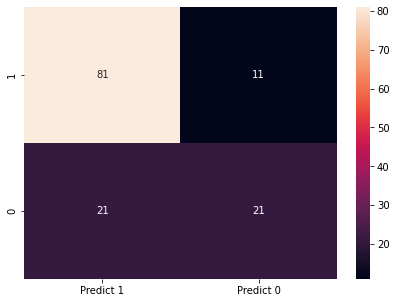

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='2g')

In [43]:
LR=LogisticRegression(solver="liblinear")
LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [44]:
y_train_predict=LR.predict(X_train)

In [45]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.47      0.59       102
           1       0.78      0.94      0.85       208

    accuracy                           0.78       310
   macro avg       0.79      0.70      0.72       310
weighted avg       0.78      0.78      0.77       310



AUC: 0.776


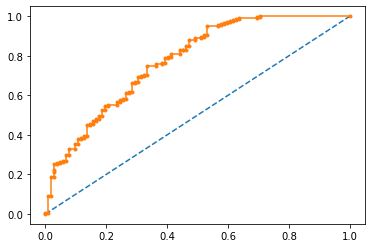

In [46]:
probs = LR.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [47]:
print(classification_report(y_test,LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57        42
           1       0.79      0.88      0.84        92

    accuracy                           0.76       134
   macro avg       0.73      0.69      0.70       134
weighted avg       0.75      0.76      0.75       134



AUC: 0.773


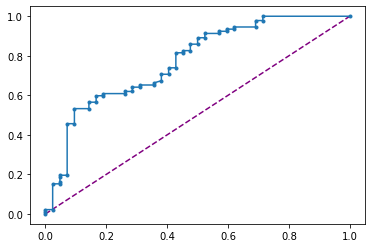

In [48]:
probs = LR.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='purple')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_train,y_train)

In [51]:
print(confusion_matrix(LDA.predict(X_train),y_train))
print(classification_report(LDA.predict(X_train),y_train))

[[ 48  11]
 [ 54 197]]
              precision    recall  f1-score   support

           0       0.47      0.81      0.60        59
           1       0.95      0.78      0.86       251

    accuracy                           0.79       310
   macro avg       0.71      0.80      0.73       310
weighted avg       0.86      0.79      0.81       310



In [52]:
print(confusion_matrix(LDA.predict(X_test),y_test))
print(classification_report(LDA.predict(X_test),y_test))

[[21 10]
 [21 82]]
              precision    recall  f1-score   support

           0       0.50      0.68      0.58        31
           1       0.89      0.80      0.84       103

    accuracy                           0.77       134
   macro avg       0.70      0.74      0.71       134
weighted avg       0.80      0.77      0.78       134



AUC: 0.776


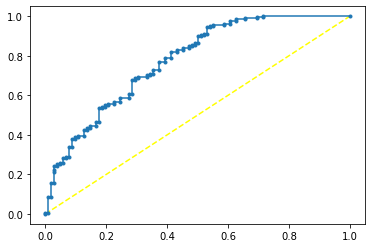

In [53]:
probs = LDA.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='yellow')
plt.plot(fpr, tpr, marker='.')

In [54]:
print(classification_report(y_test,LDA.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        42
           1       0.80      0.89      0.84        92

    accuracy                           0.77       134
   macro avg       0.74      0.70      0.71       134
weighted avg       0.76      0.77      0.76       134



AUC: 0.771


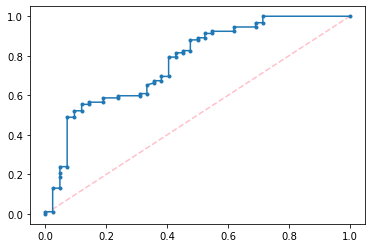

In [55]:
probs = LDA.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='pink')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [56]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[102   0]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [58]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.746268656716418
[[25 17]
 [17 75]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        42
           1       0.82      0.82      0.82        92

    accuracy                           0.75       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.75      0.75      0.75       134



AUC: 1.000


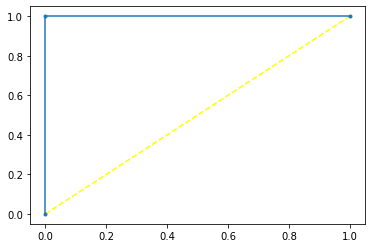

In [59]:
probs = DT_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='yellow')
plt.plot(fpr, tpr, marker='.')

AUC: 0.705


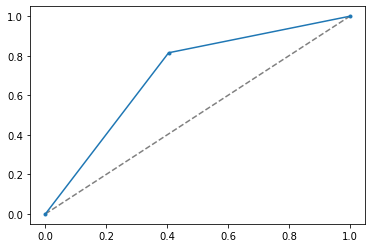

In [60]:
probs = DT_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='grey')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [61]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [62]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                     
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          
print(metrics.classification_report(y_train, y_train_predict))

0.7677419354838709
[[ 41  61]
 [ 11 197]]
              precision    recall  f1-score   support

           0       0.79      0.40      0.53       102
           1       0.76      0.95      0.85       208

    accuracy                           0.77       310
   macro avg       0.78      0.67      0.69       310
weighted avg       0.77      0.77      0.74       310



In [63]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                   
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict))

0.7835820895522388
[[18 24]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.78      0.43      0.55        42
           1       0.78      0.95      0.86        92

    accuracy                           0.78       134
   macro avg       0.78      0.69      0.71       134
weighted avg       0.78      0.78      0.76       134



In [64]:
NB_model.score(X_train, y_train)

0.7677419354838709

In [65]:
NB_model.score(X_test, y_test)

0.7835820895522388

AUC: 0.775


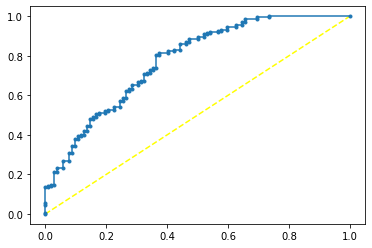

In [66]:
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='yellow')
plt.plot(fpr, tpr, marker='.')

AUC: 0.762


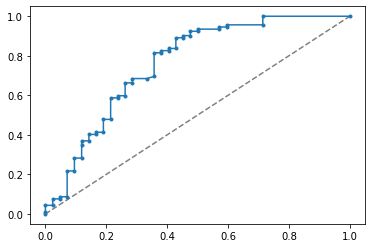

In [67]:
probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='grey')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [68]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548387096774194
[[ 68  34]
 [ 11 197]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       102
           1       0.85      0.95      0.90       208

    accuracy                           0.85       310
   macro avg       0.86      0.81      0.82       310
weighted avg       0.86      0.85      0.85       310



In [70]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7388059701492538
[[21 21]
 [14 78]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        42
           1       0.79      0.85      0.82        92

    accuracy                           0.74       134
   macro avg       0.69      0.67      0.68       134
weighted avg       0.73      0.74      0.73       134



In [71]:
ac_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.30597014925373134,
 0.24626865671641796,
 0.26119402985074625,
 0.26865671641791045,
 0.25373134328358204,
 0.26119402985074625,
 0.23880597014925375,
 0.26119402985074625,
 0.28358208955223885,
 0.27611940298507465]

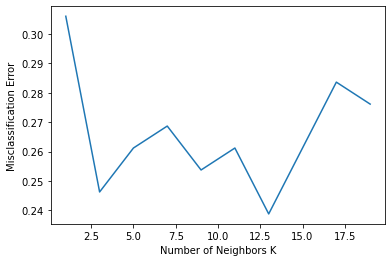

In [72]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [73]:
0.8548387096774194-0.7388059701492538  #Difference between train and test accuracy must be less than 10% for a valid model

0.11603273952816562

In [74]:
KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [75]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8129032258064516
[[ 56  46]
 [ 12 196]]
              precision    recall  f1-score   support

           0       0.82      0.55      0.66       102
           1       0.81      0.94      0.87       208

    accuracy                           0.81       310
   macro avg       0.82      0.75      0.76       310
weighted avg       0.81      0.81      0.80       310



In [76]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7611940298507462
[[22 20]
 [12 80]]
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        42
           1       0.80      0.87      0.83        92

    accuracy                           0.76       134
   macro avg       0.72      0.70      0.71       134
weighted avg       0.75      0.76      0.75       134



In [77]:
0.8129032258064516-0.7611940298507462 # As the difference between train and test accuracies is less than 10%, it is a valid model at K=13.

0.051709195955705334

In [78]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [79]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[102   0]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [80]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7686567164179104
[[22 20]
 [11 81]]
              precision    recall  f1-score   support

           0       0.67      0.52      0.59        42
           1       0.80      0.88      0.84        92

    accuracy                           0.77       134
   macro avg       0.73      0.70      0.71       134
weighted avg       0.76      0.77      0.76       134



AUC: 1.000


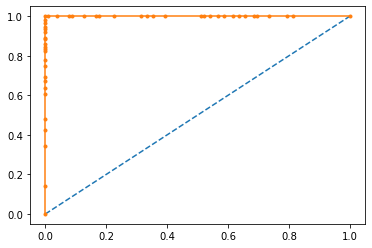

In [81]:
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

AUC: 0.779


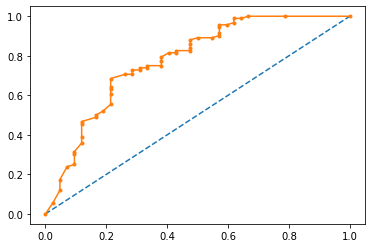

In [82]:
probs = RF_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [84]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9419354838709677
[[ 84  18]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       102
           1       0.92      1.00      0.96       208

    accuracy                           0.94       310
   macro avg       0.96      0.91      0.93       310
weighted avg       0.95      0.94      0.94       310



In [85]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7686567164179104
[[21 21]
 [10 82]]
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        42
           1       0.80      0.89      0.84        92

    accuracy                           0.77       134
   macro avg       0.74      0.70      0.71       134
weighted avg       0.76      0.77      0.76       134



AUC: 0.982


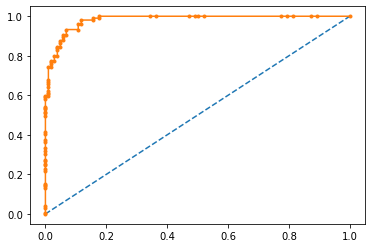

In [86]:
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

AUC: 0.772


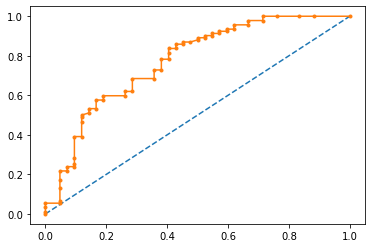

In [87]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 2.1 Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.

In [88]:
import numpy as np 
import pandas as pd 
import re 
import nltk 
import matplotlib.pyplot as plt
import string 
import matplotlib
import os

In [89]:
df=pd.read_csv('Shark Tank Companies.csv')

In [90]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [92]:
df.isnull().sum()

deal                       0
description                0
episode                    0
category                   0
entrepreneurs             72
location                   0
website                   38
askedFor                   0
exchangeForStake           0
valuation                  0
season                     0
shark1                     0
shark2                     0
shark3                     0
shark4                     0
shark5                     0
title                      0
episode-season             0
Multiple Entreprenuers     0
dtype: int64

In [93]:
df.dropna(inplace=True)
df.isnull().sum()

deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  0
exchangeForStake          0
valuation                 0
season                    0
shark1                    0
shark2                    0
shark3                    0
shark4                    0
shark5                    0
title                     0
episode-season            0
Multiple Entreprenuers    0
dtype: int64

In [94]:
data = df[["deal","description"]]
data.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...


### 2.2 Create two corpora, one for those who secured a Deal, the other for those who did not secure a deal.

In [95]:
data["deal"]=data["deal"].astype("str")
df_true = pd.DataFrame()
df_false = pd.DataFrame()
grouped=data.groupby(data.deal)
df_true=grouped.get_group("True")
df_false=grouped.get_group("False")

In [96]:
grouped.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...
6,False,A mixed martial arts clothing line looking to ...
7,False,"Attach Noted is a detachable ""arm"" that holds ..."
8,False,A safety device for seatbelts. It prevents the...
12,True,A line of books written to help children find ...
16,True,Coverplay is a slipcover for children's play y...


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         387 non-null    object
 1   description  387 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


In [98]:
data.describe()

,deal,description
count,387,387
unique,2,385
top,True,Premium wine sold by the glass in individually...
freq,204,2


In [99]:
df_true.describe()

,deal,description
count,204,204
unique,1,203
top,True,"Echo Valley Meats is a retail, online gift cat..."
freq,204,2


In [100]:
df_false.describe()

,deal,description
count,183,183
unique,1,182
top,False,Premium wine sold by the glass in individually...
freq,183,2


### 2.3 a).Find the number of characters for both the corpuses.

In [101]:
df_true.drop(["deal"],axis=1,inplace=True)
df_true.head()

,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
12,A line of books written to help children find ...
16,Coverplay is a slipcover for children's play y...


In [102]:
df_true["chars"]=df_true["description"].str.len()
df_false["chars"]=df_false["description"].str.len()
sum_true=df_true["chars"].sum()
sum_false=df_false["chars"].sum()
print("True Corpus",sum_true)
print("False Corpus",sum_false)

True Corpus 50302
False Corpus 34899


### b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed).



In [103]:
df_true=df_true.astype("str")
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  204 non-null    object
 1   chars        204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [104]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
nsw_true=[]
for x in df_true["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    for i in tokens_without_sw:
        nsw_true.append(i)
print(tokens_without_sw)

['Sway', 'Motorsports', 'makes', 'three-wheeled', ',', 'all-electric', ',', 'street', 'legal', 'ride', '.', 'It', "'s", 'like', 'motorcycles', 'scooters', 'market', 'control', 'mechanism', '.', 'Affording', 'riders', 'slightly', 'wider', 'footprint', 'ability', 'control', 'tilt', 'vehicle', 'legs', ',', 'Sway', 'vehicles', 'offer', 'greater', 'stability', 'tighter', 'turns', '.', 'Riders', "n't", 'struggle', 'balance', 'vehicle', 'put', 'foot', 'stops', ',', 'reason', ',', "'s", 'also', 'easier', 'carry', 'passenger', 'baggage', 'Sway', 'vehicles', '.']


In [106]:
print(stopwords.words('english'))
nsw_false=[]
print("False:")
tokens_without_sw_freq=[]
for x in df_false["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    for i in tokens_without_sw:
        nsw_false.append(i)
print(tokens_without_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?

In [107]:
freq = nltk.FreqDist(nsw_false)
freq_false=freq.most_common(3)
print(freq_false)
freq = nltk.FreqDist(nsw_true)
freq_true=freq.most_common(3)
print(freq_true)

[('.', 326), (',', 268), ('A', 55)]
[('.', 470), (',', 443), ("'s", 69)]


### d).Plot the Word Cloud for both the corpora.

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [109]:
comment_words = ''
val=''
type(nsw_true)
comment_words_true=' '.join(nsw_true)
comment_words_false=' '.join(nsw_false)
print(comment_words)

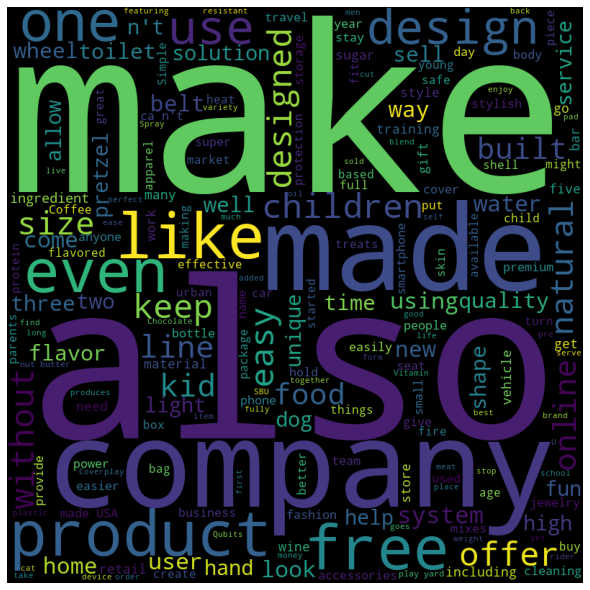

In [110]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_true)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

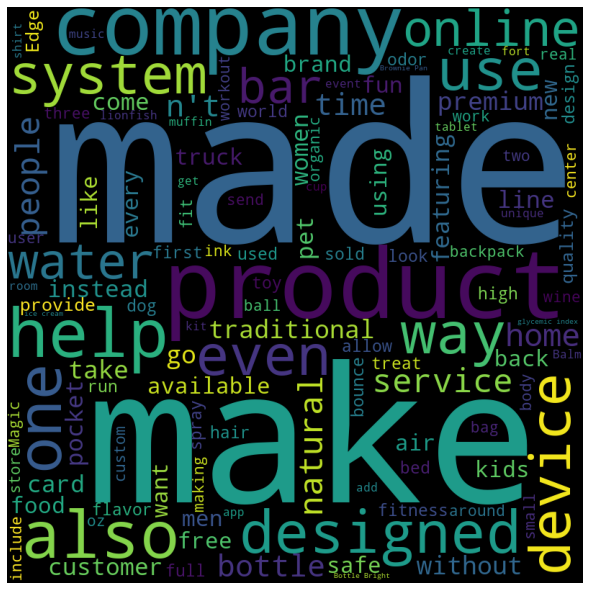

In [111]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()